In [1]:
import pandas as pd
import numpy as np

# Problem 1

Import and explore the district-level fiscal data from 2015-16

In [2]:
district_fiscal_data = pd.read_csv("/Users/stian/Desktop/DS5500/hw3/Sdf16_1a.txt", sep='\t')
district_fiscal_data[['V33','TFEDREV']]

/Users/stian/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,V33,TFEDREV
0,-1,-1
1,5214,7277000
2,5635,7747000
3,13910,6088000
4,10011,5007000
...,...,...
18703,-2,-2
18704,0,-2
18705,0,-2
18706,0,-2


Rank and visualize the states that take in the most federal funding (revenue).

From the description of column names, I know that "TFEDREV" represents for the total federal revenue. First groupby the state, then sort by the total federal revenue. Noticed that 1740 of them have a negative TFEDREV (-1 or -2). Here I drop them.

In [3]:
district_fiscal_data = district_fiscal_data[district_fiscal_data.TFEDREV > 0]

In [4]:
district_fiscal_data_grouped = district_fiscal_data.groupby("STNAME").sum()
district_fiscal_data_sorted = district_fiscal_data_grouped.sort_values(by='TFEDREV', ascending=False)
district_fiscal_data_sorted

,FIPST,YEAR,CCDNF,CENFILE,V33,MEMBERSCH,TOTALREV,TFEDREV,C14,C15,...,_66V,W01,W31,W61,V95,V02,K14,CE1,CE2,WEIGHT
STNAME,,,,,,,,,,,,,,,,,,,,,
California,6108,16288,1018,1017,6203559,6187037,89110947000,7709275000,1798207000,1821197000,...,0,4946663000,10871931000,29391495000,0,0,0,-1018,-1018,1018
Texas,58368,19456,1216,1044,5296442,5296378,60768409000,6194317000,1347799000,847121000,...,3618330000,2947662000,12040448000,18156976000,1196458000,0,0,41141377000,4911673000,1216
New York,24732,10992,687,677,2591958,2572154,67051220000,3374794000,1035611000,699120000,...,2032288000,428102000,1425604000,9234538000,0,0,0,-687,-687,687
Florida,804,1072,67,67,2776933,2776067,28125598000,3147329000,808874000,606538000,...,0,633122000,1136097000,6836238000,0,0,0,21654985000,3115137000,67
Illinois,16524,15552,972,970,2029830,2007587,32884195000,2334945000,681879000,544336000,...,920029000,1366956000,1211789000,12929989000,0,0,0,-971,-971,972
Pennsylvania,31836,12128,758,592,1700375,1701253,32814988000,2037315000,568025000,424972000,...,39762000,217430000,2643570000,7330297000,439106000,244521000,0,-758,-758,758
Ohio,41340,16960,1059,702,1711138,1709658,24870176000,1837963000,548913000,384547000,...,109521000,919348000,2869311000,7409551000,373940000,530949000,86918000,18828441000,1443273000,1060
Georgia,2782,3424,214,196,1741838,1741990,19532968000,1815242000,537960000,323744000,...,44312000,467603000,2723561000,3259453000,389657000,364627000,47820000,14994662000,1966776000,214
Michigan,23010,14160,885,595,1481694,1479649,20826612000,1731034000,457643000,377892000,...,655429000,274227000,5139052000,4067991000,267742000,0,0,15266743000,1597060000,885


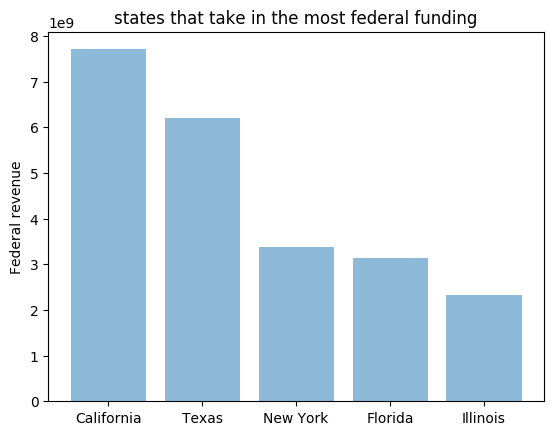

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = district_fiscal_data_sorted.head().TFEDREV.index
y_pos = np.arange(len(objects))
performance = district_fiscal_data_sorted.head().TFEDREV.values

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Federal revenue')
plt.title('states that take in the most federal funding')

plt.show()

Which states spend the most federal funding per student?

In [6]:
district_fiscal_data_sorted['ff_per_stu'] = district_fiscal_data_sorted['TFEDREV']/district_fiscal_data_sorted['V33']


In [7]:
district_fiscal_data_sorted.sort_values(by="ff_per_stu", ascending=False)['ff_per_stu']

STNAME
District of Columbia    2726.573612
Alaska                  2319.798908
Vermont                 1870.899241
Louisiana               1556.713877
New Mexico              1541.345235
Montana                 1519.387115
South Dakota            1466.999888
North Dakota            1435.591264
Hawaii                  1434.825133
Mississippi             1420.526689
Rhode Island            1327.877065
New York                1302.024956
Wyoming                 1301.562781
West Virginia           1298.616618
Kentucky                1282.407785
California              1242.718091
Arkansas                1235.510971
Arizona                 1206.863310
Pennsylvania            1198.156289
Texas                   1169.524182
Michigan                1168.280360
Illinois                1150.315544
Florida                 1133.383124
South Carolina          1128.249789
Nebraska                1099.220335
Tennessee               1096.993775
Alabama                 1080.826686
Ohio                 

So DC has the most federal funding per student.

# Problem 2

In [8]:
district_fiscal_data = district_fiscal_data[district_fiscal_data['TOTALEXP'] > 0]
sample = district_fiscal_data[['STNAME','TOTALREV','TOTALEXP','V33']]

In [9]:
district_fiscal_data_grouped_ = sample.groupby("STNAME").sum()
district_fiscal_data_grouped_['debt_per_stu'] = np.subtract(district_fiscal_data_grouped_['TOTALEXP'],
                                                            district_fiscal_data_grouped_['TOTALREV'])/district_fiscal_data_grouped_['V33']
district_fiscal_data_grouped_

,TOTALREV,TOTALEXP,V33,debt_per_stu
STNAME,,,,
Alabama,7607098000,7864636000,743789,346.251423
Alaska,2494691000,2623014000,132477,968.643614
Arizona,9830650000,9346841000,1078838,-448.453799
Arkansas,5513815000,5541889000,491251,57.147975
California,89110947000,85206481000,6203559,-629.391290
Colorado,10256106000,10016176000,895709,-267.866015
Connecticut,11551738000,10980546000,511443,-1116.824358
Delaware,2222987000,2211920000,134845,-82.072009
District of Columbia,2138284000,2247392000,82962,1315.156337


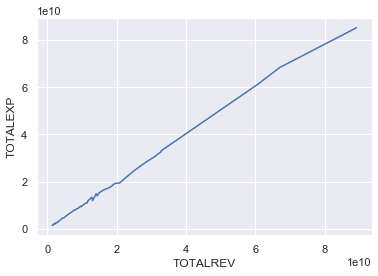

In [10]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="TOTALREV", y="TOTALEXP", data=district_fiscal_data_grouped_)

In [11]:
district_fiscal_data_grouped_.sort_values(by="debt_per_stu",ascending=False)

,TOTALREV,TOTALEXP,V33,debt_per_stu
STNAME,,,,
North Dakota,1787486000,1962859000,108285,1619.550261
District of Columbia,2138284000,2247392000,82962,1315.156337
Alaska,2494691000,2623014000,132477,968.643614
Nebraska,4398811000,4640422000,315520,765.754944
Minnesota,12869206000,13464111000,861784,690.317992
Montana,1797849000,1876344000,145019,541.273902
New York,67051220000,68420942000,2591958,528.450692
North Carolina,14119703000,14901003000,1543632,506.143951
Alabama,7607098000,7864636000,743789,346.251423


So South Dakota has the highest debt per student.

# Problem 3

For the math dataset, the ALL_MTH00PCTPROF_1516 column is a "blurred". 

In [18]:
math_result = pd.read_csv("/Users/stian/Desktop/DS5500/hw3/math-achievement-lea-sy2015-16.csv")
math_result.ALL_MTH00PCTPROF_1516

/Users/stian/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0           42
1           39
2           66
3           72
4           37
         ...  
16232       50
16233    50-59
16234       59
16235    45-49
16236       58
Name: ALL_MTH00PCTPROF_1516, Length: 16237, dtype: object

In [19]:
a = [1,2,3]
for s in a:
    s = 4
a

[1, 2, 3]

In [20]:
a.pop()

3

In [21]:
def impute(data):
    number_nan = data.isna().sum()
    a = data.replace(np.nan, "nan")
    
    for i in range(len(a)):
        if '-' in a[i]:
            temp = a[i].split("-")
            num = np.mean([int(temp[0]),int(temp[1])])
        elif 'L' in a[i]:
            temp = a[i][2:]
            num = np.mean([0,int(temp)])
        elif 'G' in a[i]:
            temp = a[i][2:]
            num = np.mean([int(temp), 100])
        elif 'PS' in a[i]:
            a[i] = 'nan'
        else:
            num = int(a[i])
        a[i] = num
        
    mu = np.mean(a)
    sigma = np.std(a)
    
    nan_sub = np.random.normal(mu, sigma, number_nan)
    
    for i in range(len(a)):
        if a[i] == "nan":
            nn_ = nan_sub.pop()
            a[i] = nn_
    
    return a  
  

In [22]:
imputed = impute(math_result.ALL_MTH00PCTPROF_1516)
imputed

0          42
1          39
2          66
3          72
4          37
         ... 
16232      50
16233    54.5
16234      59
16235      47
16236      58
Name: ALL_MTH00PCTPROF_1516, Length: 16237, dtype: object

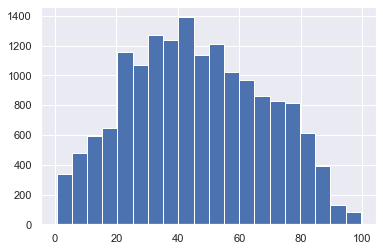

In [23]:
imputed.hist(bins=20)

# Problem 4

In [24]:
district_fiscal_data.TFEDREV.sum()*0.15

8340345450.0

My solution: cut 15% budget for all school districts.

In [25]:
cut = district_fiscal_data.copy()
cut['cut'] = cut['TFEDREV']*0.15
cut[['LEAID','cut']]

,LEAID,cut
1,100005,1091550.0
2,100006,1162050.0
3,100007,913200.0
4,100008,751050.0
6,100011,228300.0
...,...,...
18697,5605762,310650.0
18698,5605820,38700.0
18699,5605830,277950.0
18700,5606090,32850.0


# Problem 5

If we are gonna cut 15% of our budget, I suggest that we should cut 15% for every school district. If we are gonna cut same amout (total cut/number of school district) for each school district, it would be unfair to some small school districts like their remaining budget may be negative. But if we are gonna cut from districts with high budget per students, it still maybe unfair because these districts maybe due to some reasons need more helps from the Federal, cutting their budget may increase the gap between them and other districts. So the most fairest way is to cut same portion from each district.